## Investigation into Texas AirBnB Dataset

#### Using a dataset of ~18,000 rows, I wanted to visualize trends related to AirBnB data in Texas. 

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from itertools import cycle, islice

In [2]:
bnb = pd.read_csv('Airbnb_Texas_Rentals.csv',index_col = 0)
bnb = bnb.drop(['date_of_listing','description','latitude','longitude','title','url'], axis = 1)
bnb.head()


,average_rate_per_night,bedrooms_count,city
1,$27,2,Humble
2,$149,4,San Antonio
3,$59,1,Houston
4,$60,1,Bryan
5,$75,2,Fort Worth


In [3]:
bnb['average_rate_per_night'] = bnb['average_rate_per_night'].str.replace('$', '')
bnb = bnb.dropna()
bnb['average_rate_per_night'] = bnb['average_rate_per_night'].astype(int)
bnb['bedrooms_count'] = pd.Categorical(bnb['bedrooms_count'])
bnb.tail(n=20)

,average_rate_per_night,bedrooms_count,city
18240,40,1,Abilene
18241,101,2,Plano
18242,34,1,San Antonio
18243,39,1,Dallas
18244,75,1,Tuscola
18245,90,2,Addison
18246,75,1,San Antonio
18247,299,4,San Antonio
18248,48,1,Dallas
18249,75,1,San Antonio


### Finding the Average Rate by Bedroom count

In [5]:
bnb = bnb.groupby('bedrooms_count', as_index = False)['average_rate_per_night'].median()
bnb
#bnb.plot.bar(x = 'bedrooms_count', y = 'average_rate_per_night', rot = 0)

,bedrooms_count,average_rate_per_night
0,1,65.0
1,10,1865.0
2,11,4803.0
3,13,3049.0
4,2,150.0
5,3,250.0
6,4,387.5
7,5,635.0
8,6,850.0
9,7,1184.5


In [4]:
d = {'Bedroom Count': ['Studio','1', '2','3','4','5','6','7','8','9','10','11','13'], 
     'Average Rate Per Night': [90, 65.0, 150.0,250.0,387.5,635,850,1184.5,
                                1400,1500,1865,4803.000000,3049.000000,]}
df = pd.DataFrame(data=d)

### Display as Bar Chart

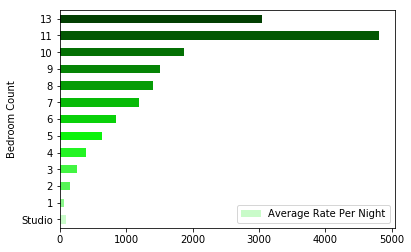

In [6]:
my_colors = list(islice(cycle(['#C9FBC9', '#8BF78B', '#56F556', '#42F542', '#23F423',
                               '#0BF30B','#09D109','#07BA07','#069C06','#058405','#047004','#035803','#023F02']), None, len(df)))
df.plot.barh(x = 'Bedroom Count', y = 'Average Rate Per Night', color = my_colors,  rot = 0)

### Display Top 10 Texas Cities with Most Listings

Text(0,0.5,'City')

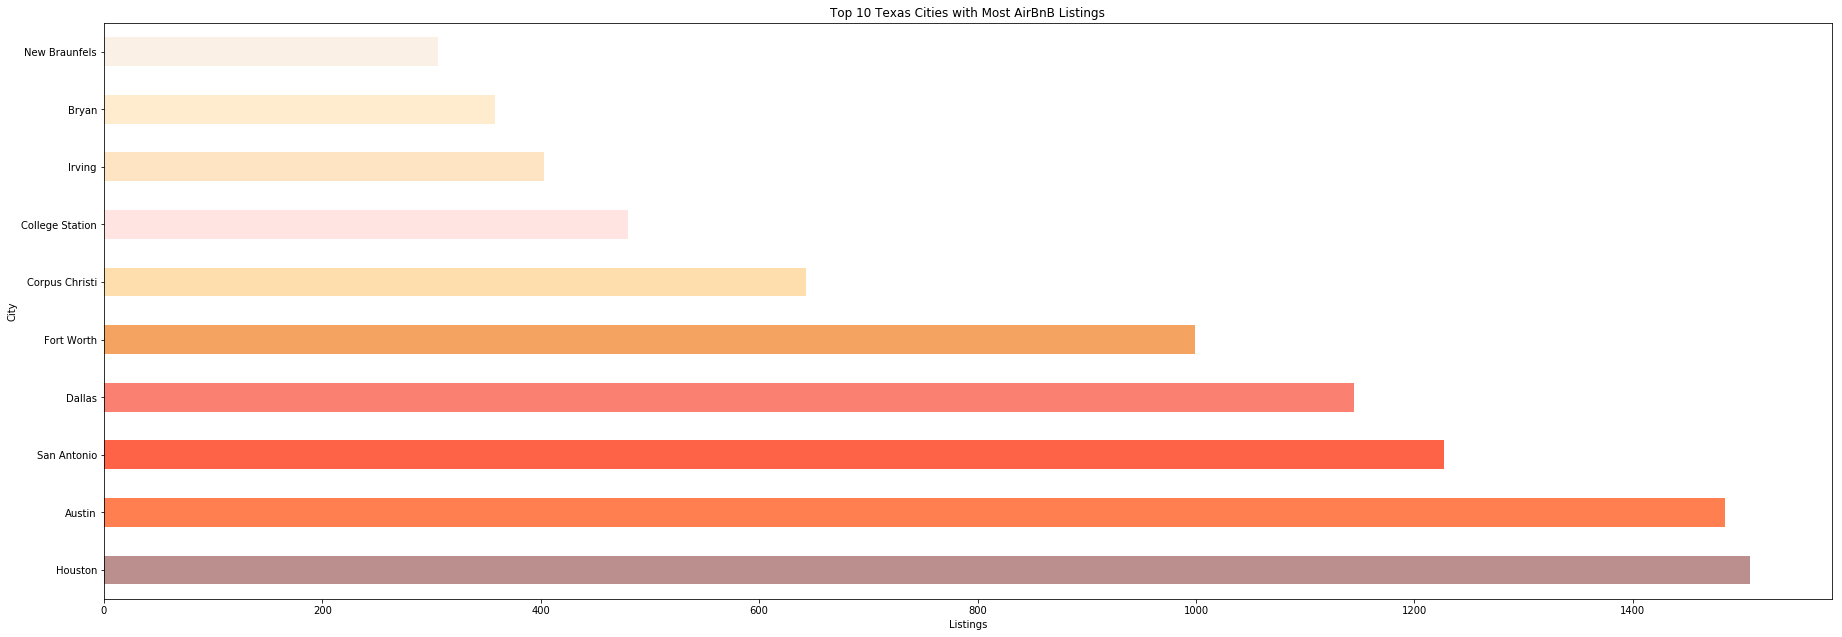

In [9]:
data = pd.read_csv('Airbnb_Texas_Rentals.csv')
data['city'].value_counts()[:10].plot(kind='barh', color = ['rosybrown','coral','tomato','salmon','sandybrown','navajowhite','mistyrose',
'bisque','blanchedalmond','linen'])
plt.subplots_adjust(left=2, bottom=2, right=6, top=4, wspace=2, hspace=2)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
matplotlib.pyplot.title('Top 10 Texas Cities with Most AirBnB Listings', fontdict=None, loc='center', pad=None)
plt.xlabel('Listings')
plt.ylabel('City')


### Display Top 10 Dates with Lowest Listings

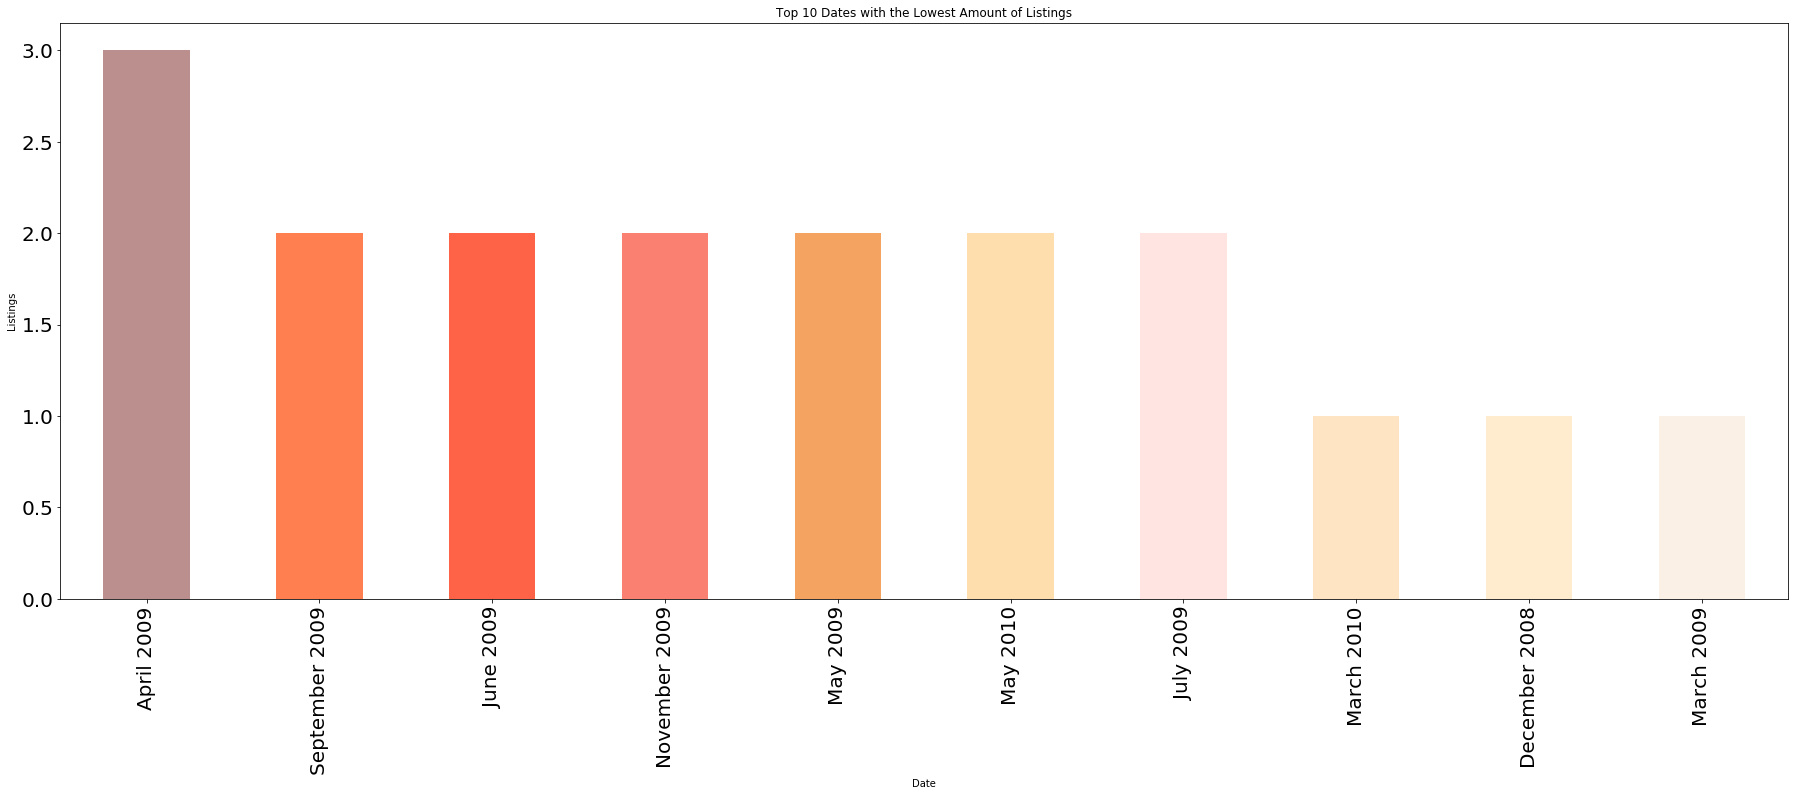

In [10]:
data['date_of_listing'].value_counts()[92:].plot(kind='bar', color = ['rosybrown','coral','tomato','salmon','sandybrown','navajowhite','mistyrose','bisque','blanchedalmond','linen'])
plt.subplots_adjust(left=2, bottom=2, right=6, top=4, wspace=2, hspace=2)
matplotlib.pyplot.title('Top 10 Dates with the Lowest Amount of Listings')
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
plt.xlabel('Date')
plt.ylabel('Listings')
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}	
matplotlib.rc('font', **font)


### Display Top 10 Dates with Highest Listings

C:\Users\ak8ae\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


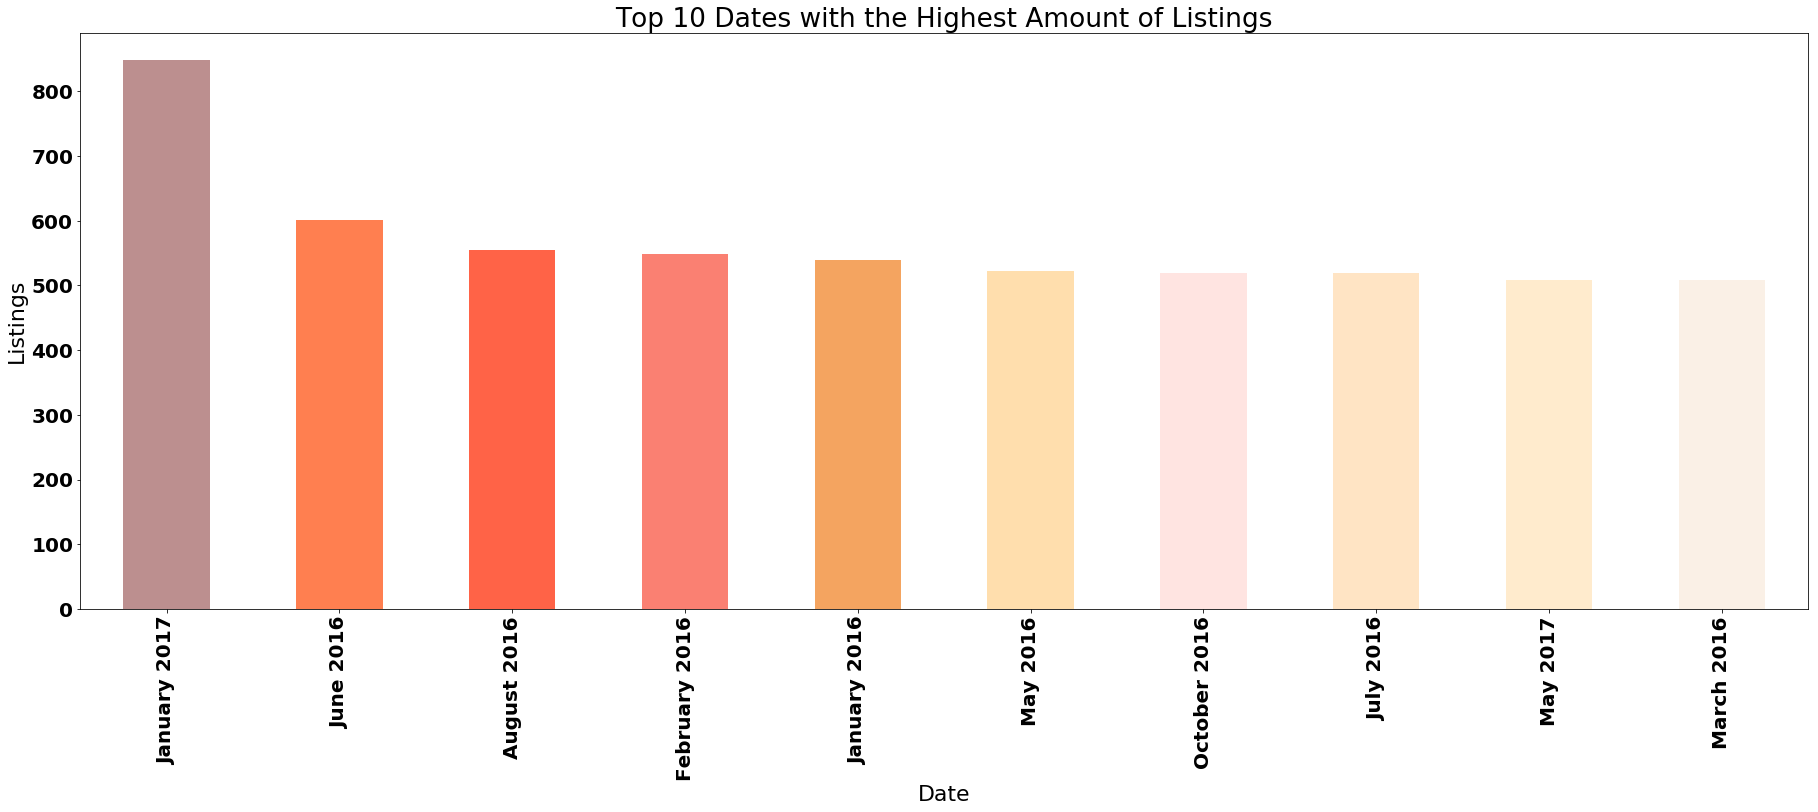

In [11]:
data['date_of_listing'].value_counts()[:10].plot(kind='bar', color = ['rosybrown','coral','tomato','salmon','sandybrown','navajowhite','mistyrose','bisque','blanchedalmond','linen'])
plt.subplots_adjust(left=2, bottom=2, right=6, top=4, wspace=2, hspace=2)
matplotlib.pyplot.title('Top 10 Dates with the Highest Amount of Listings')
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
plt.xlabel('Date')
plt.ylabel('Listings')
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}	
matplotlib.rc('font', **font)
